# The Sparks Foundation - Internship
#### Data Science and Business Analytics (Task-3)

## Name - Shyam Modi
## Prediction Using Decision Tree Algorithm

#### Iris dataset prediction
#### Dataset - https://bit.ly/3kXTdox

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 1. Loading the dataset

In [2]:
iris_set = datasets.load_iris()
iris_data = pd.DataFrame(iris_set.data, columns=iris_set.feature_names)
iris_data["species"] = iris_set.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

## 2. Description and data-processing

In [4]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

## 3. Data Exploration

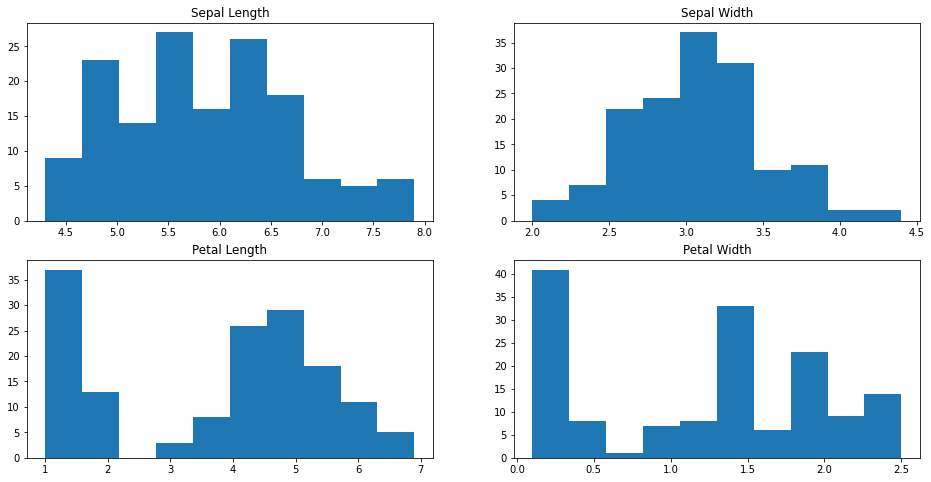

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#plot for sepal length
axes[0,0].set_title('Sepal Length')
axes[0,0].hist(iris_data["sepal length (cm)"]);

#plot for sepal width
axes[0,1].set_title('Sepal Width')
axes[0,1].hist(iris_data["sepal width (cm)"]);

#plot for petal length
axes[1,0].set_title('Petal Length')
axes[1,0].hist(iris_data["petal length (cm)"]); 

#plot for petal width
axes[1,1].set_title('Petal Width')
axes[1,1].hist(iris_data["petal width (cm)"]);

In [10]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

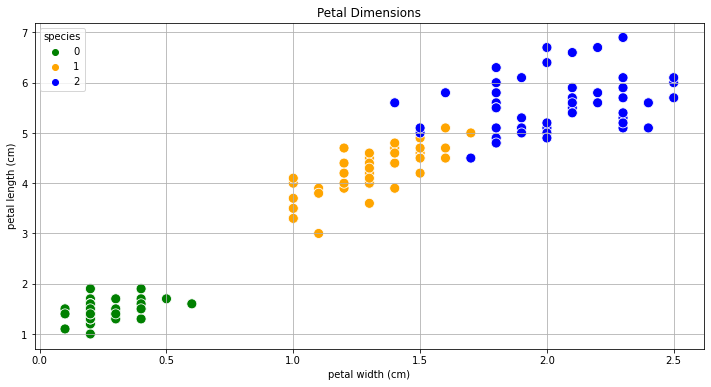

In [11]:
plt.figure(figsize=(12, 6))
plt.title('Petal Dimensions')

sns.scatterplot(y=iris_data["petal length (cm)"], 
                x=iris_data["petal width (cm)"], 
                hue=iris_data["species"],palette = ["green","orange","blue"],
                s=100);
plt.grid()

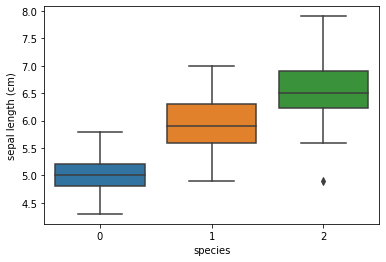

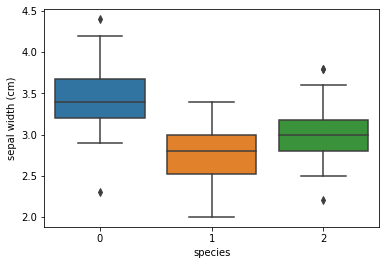

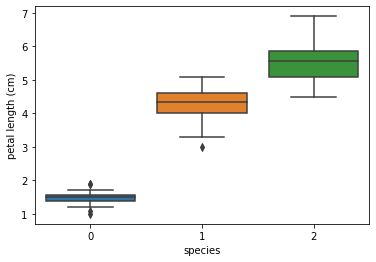

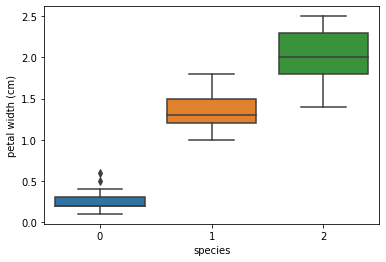

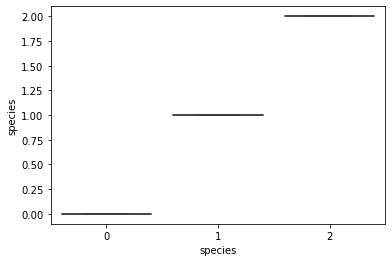

In [12]:
for col in iris_data.columns:
    if iris_data[col].dtypes != "object":
        sns.boxplot(iris_data['species'],iris_data[col])     #Hence the features with Species has linear realtionship
        plt.show()

## 4. Analysing correlation 

<AxesSubplot:>

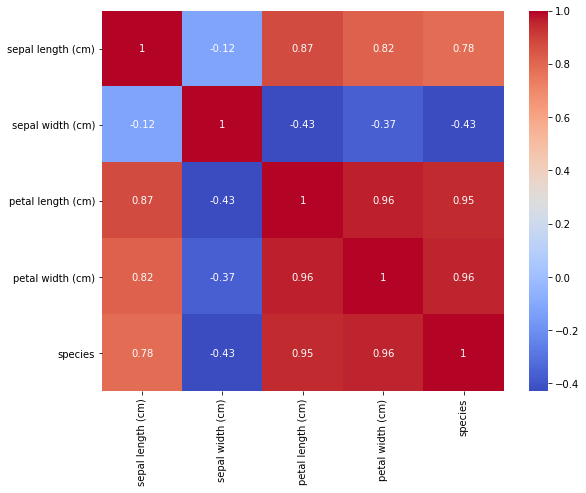

In [13]:
corr = iris_data.corr()
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

## 5. Splitting The Data into Training And Testing

In [14]:
X = iris_data.drop('species', axis = 1)
Y = iris_data['species']

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_data, test_size = 0.2)

In [16]:
train.shape, test.shape

((120, 5), (30, 5))

In [17]:
train_x = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
train_y = train.species
test_x = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
test_y = test.species

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
tree = DecisionTreeClassifier()
tree.fit(train_x,train_y)
predictions = tree.predict(test_x)
print("The accuracy of Decision Tree is:", metrics.accuracy_score(predictions, test_y))

The accuracy of Decision Tree is: 0.9333333333333333


In [19]:
X = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
Y = iris_data.species

In [20]:
tree1 = DecisionTreeClassifier()
tree1.fit(X,Y)
print("Decision Tree Classifier is created")

Decision Tree Classifier is created


## 6. Visualization

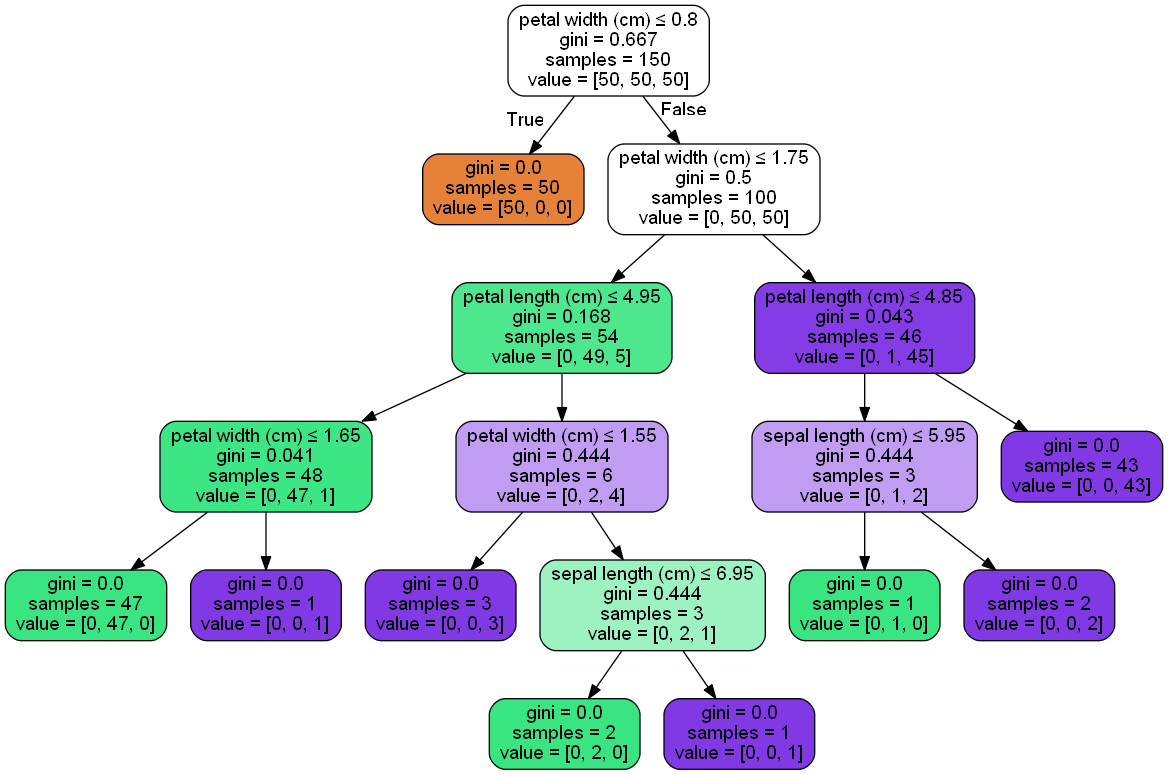

In [21]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(tree1, out_file=dot_data, feature_names=iris_set.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Now load any new/test data to this classifer to predict the right class accordingly.
#### leaf nodes are homogenous